### Data was collected and cleaned as described in NHANES_all.ipyn. This part will focus on analysing the data for identifying parameters that could be used to predict breast cancer.  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('nhanes_breast_cancer_all_nhanes_blood.csv')

In [3]:
df['Breast cancer'].value_counts()

1    583
0    583
Name: Breast cancer, dtype: int64

In [4]:
df.head()

,Id,Age,Bl_basophils number (1000 cells/ul),Bl_basophils percent (%),Bl_eosinophils number (1000 cells/ul),Bl_eosinophils percent (%),Bl_hematocrit (%),Bl_hemoglobin (g/dl),Bl_lymphocyte number (1000 cells/ul),Bl_lymphocyte percent (%),...,Bl_mean platelet volume (fl),Bl_monocyte number (1000 cells/ul),Bl_monocyte percent (%),Bl_platelet count (1000 cells/ul),Bl_red blood cell count (million cells/ul),Bl_red cell distribution width (%),Bl_segmented neutrophils num (1000 cell/ul),Bl_segmented neutrophils percent (%),Bl_white blood cell count (1000 cells/ul),Breast cancer
0,94.0,61.0,5.397605e-79,0.6,0.1,0.9,35.6,11.6,2.7,43.9,...,8.6,0.6,9.3,322.0,3.84,12.9,2.8,45.3,6.1,1
1,198.0,49.0,5.397605e-79,0.8,0.1,0.9,41.3,14.5,2.5,41.1,...,9.9,0.4,7.1,187.0,4.57,12.3,3.1,50.1,6.2,0
2,206.0,50.0,5.397605e-79,0.7,0.1,1.6,36.7,12.0,1.9,33.8,...,7.3,0.3,5.7,301.0,4.27,13.4,3.3,58.3,5.6,1
3,237.0,81.0,5.397605e-79,0.6,0.1,1.9,41.8,14.3,2.2,34.3,...,8.2,0.6,9.8,287.0,4.53,12.3,3.4,53.3,6.4,1
4,389.0,81.0,1.000000e-01,1.1,0.2,3.7,38.7,13.3,1.1,21.7,...,8.7,0.5,10.9,191.0,4.16,13.3,3.1,62.7,4.9,1


In [5]:
df.isna().sum()

Id                                             0
Age                                            0
Bl_basophils number (1000 cells/ul)            0
Bl_basophils percent (%)                       0
Bl_eosinophils number (1000 cells/ul)          0
Bl_eosinophils percent (%)                     0
Bl_hematocrit (%)                              0
Bl_hemoglobin (g/dl)                           0
Bl_lymphocyte number (1000 cells/ul)           0
Bl_lymphocyte percent (%)                      0
Bl_mean cell volume (fl)                       0
Bl_mean platelet volume (fl)                   0
Bl_monocyte number (1000 cells/ul)             0
Bl_monocyte percent (%)                        0
Bl_platelet count (1000 cells/ul)              0
Bl_red blood cell count (million cells/ul)     0
Bl_red cell distribution width (%)             0
Bl_segmented neutrophils num (1000 cell/ul)    0
Bl_segmented neutrophils percent (%)           0
Bl_white blood cell count (1000 cells/ul)      0
Breast cancer       

In [6]:
df.describe()

,Id,Age,Bl_basophils number (1000 cells/ul),Bl_basophils percent (%),Bl_eosinophils number (1000 cells/ul),Bl_eosinophils percent (%),Bl_hematocrit (%),Bl_hemoglobin (g/dl),Bl_lymphocyte number (1000 cells/ul),Bl_lymphocyte percent (%),...,Bl_mean platelet volume (fl),Bl_monocyte number (1000 cells/ul),Bl_monocyte percent (%),Bl_platelet count (1000 cells/ul),Bl_red blood cell count (million cells/ul),Bl_red cell distribution width (%),Bl_segmented neutrophils num (1000 cell/ul),Bl_segmented neutrophils percent (%),Bl_white blood cell count (1000 cells/ul),Breast cancer
count,1166.000000,1166.000000,1.166000e+03,1.166000e+03,1.166000e+03,1.166000e+03,1166.000000,1166.000000,1166.000000,1166.000000,...,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,48485.967410,54.553173,4.022298e-02,6.980274e-01,1.903945e-01,2.720669e+00,39.358919,13.308834,2.026587,29.348714,...,8.218782,0.537479,7.847084,259.210892,4.421724,13.273499,4.296569,59.433105,7.093825,0.500000
std,26451.647198,22.001018,5.713880e-02,4.797580e-01,1.793465e-01,2.473265e+00,3.507248,1.253712,0.716450,8.632412,...,0.922731,0.195249,2.595543,72.191234,0.411817,1.446675,1.721155,9.839603,2.082528,0.500215
min,94.000000,12.000000,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,21.900000,7.300000,0.500000,5.100000,...,5.500000,0.100000,1.300000,27.000000,2.530000,10.600000,0.400000,5.300000,2.700000,0.000000
25%,25834.250000,37.000000,5.397605e-79,4.000000e-01,1.000000e-01,1.400000e+00,37.300000,12.600000,1.525000,23.400000,...,7.600000,0.400000,6.300000,214.000000,4.150000,12.400000,3.200000,53.225000,5.600000,0.000000
50%,48095.500000,60.000000,5.397605e-79,6.000000e-01,2.000000e-01,2.200000e+00,39.400000,13.400000,1.900000,29.000000,...,8.200000,0.500000,7.600000,249.500000,4.430000,13.000000,4.000000,59.700000,6.850000,0.500000
75%,70704.250000,73.000000,1.000000e-01,9.000000e-01,2.000000e-01,3.400000e+00,41.400000,14.100000,2.400000,34.300000,...,8.800000,0.600000,9.100000,295.000000,4.660000,13.700000,5.100000,65.900000,8.100000,1.000000
max,93695.000000,85.000000,7.000000e-01,6.300000e+00,4.000000e+00,5.720000e+01,57.800000,19.700000,6.700000,71.800000,...,13.300000,3.400000,38.900000,999.900000,6.700000,26.000000,15.800000,89.600000,18.400000,1.000000


# Split set train test

In [7]:
seed=666
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

id_col = ['Id']
target_col = ['Breast cancer']
# i will ignore the age column for now
num_col = [i for i in df.columns if i.startswith('Bl')]

train, test = train_test_split(df, test_size=.2, random_state=seed)

train_X = train[num_col].reset_index(drop=True)
train_Y = train[target_col].reset_index(drop=True)

test_X = test[num_col].reset_index(drop=True)
test_Y = test[target_col].reset_index(drop=True)


In [8]:
test['Breast cancer'].value_counts()

1    130
0    104
Name: Breast cancer, dtype: int64

In [9]:
train['Breast cancer'].value_counts()

0    479
1    453
Name: Breast cancer, dtype: int64

# Feature scaling - prior to feature selection
right or wrong?

In [10]:
# Feature scaling - standardize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler

std = scaler()
scaled_fitted = std.fit(train_X[num_col])
scaled_train = scaled_fitted.transform(train_X[num_col])
scaled_train = pd.DataFrame(scaled_train, columns=num_col)

In [11]:
scaled_train.describe()

,Bl_basophils number (1000 cells/ul),Bl_basophils percent (%),Bl_eosinophils number (1000 cells/ul),Bl_eosinophils percent (%),Bl_hematocrit (%),Bl_hemoglobin (g/dl),Bl_lymphocyte number (1000 cells/ul),Bl_lymphocyte percent (%),Bl_mean cell volume (fl),Bl_mean platelet volume (fl),Bl_monocyte number (1000 cells/ul),Bl_monocyte percent (%),Bl_platelet count (1000 cells/ul),Bl_red blood cell count (million cells/ul),Bl_red cell distribution width (%),Bl_segmented neutrophils num (1000 cell/ul),Bl_segmented neutrophils percent (%),Bl_white blood cell count (1000 cells/ul)
count,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02
mean,1.296054e-16,-1.124518e-16,-3.144838e-17,-4.002521e-17,-4.383713e-16,3.354494e-16,-3.287785e-16,-1.505710e-16,-1.004442e-15,1.398976e-15,-2.001260e-16,2.992361e-16,-1.067339e-16,2.969489e-15,-1.328456e-15,-2.496811e-16,4.955502e-17,1.429472e-17
std,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00
min,-7.051361e-01,-1.438121e+00,-1.007315e+00,-1.043951e+00,-4.246469e+00,-4.516969e+00,-2.211828e+00,-2.615258e+00,-4.687727e+00,-2.988028e+00,-2.192860e+00,-2.433704e+00,-3.201587e+00,-4.069631e+00,-1.826769e+00,-2.233912e+00,-5.547815e+00,-2.087482e+00
25%,-7.051361e-01,-6.108851e-01,-4.828360e-01,-5.136231e-01,-5.711604e-01,-5.548646e-01,-6.165233e-01,-6.866458e-01,-4.400290e-01,-6.834219e-01,-6.948790e-01,-5.832202e-01,-6.257091e-01,-6.505685e-01,-5.895016e-01,-6.845441e-01,-6.442068e-01,-7.093899e-01
50%,-7.051361e-01,-1.972673e-01,4.164320e-02,-1.726980e-01,-1.559044e-02,7.907204e-02,-1.814402e-01,-4.972769e-02,9.750090e-02,-2.496303e-02,-1.955519e-01,-6.508463e-02,-1.393067e-01,2.361288e-02,-1.770791e-01,-1.680883e-01,5.117665e-02,-9.162464e-02
75%,1.019764e+00,4.231594e-01,4.164320e-02,2.439882e-01,5.969610e-01,6.337666e-01,5.436983e-01,5.871904e-01,6.026981e-01,6.334958e-01,3.037752e-01,4.530509e-01,5.115134e-01,5.774047e-01,3.040805e-01,4.631356e-01,6.541845e-01,4.786202e-01
max,1.136916e+01,1.159084e+01,1.997185e+01,2.062373e+01,5.269447e+00,5.071323e+00,5.474640e+00,3.694399e+00,3.411595e+00,5.571937e+00,1.428493e+01,1.148194e+01,1.012858e+01,5.489298e+00,8.758742e+00,6.603222e+00,3.104706e+00,5.373222e+00


# Feature Selection with non scaled set
###### https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
### 1. Univariate Selection
- Select features according to the k highest scores using hi-squared (chi²) statistical test for non-negative features to select 10 of the best feature


In [12]:
# import modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [13]:
X = train[num_col].reset_index(drop=True) # indepoendent columns
y = train[target_col].reset_index(drop=True) # target column


In [14]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                                        Specs       Score
12          Bl_platelet count (1000 cells/ul)  444.233320
7                   Bl_lymphocyte percent (%)   75.981074
16       Bl_segmented neutrophils percent (%)   25.699488
8                    Bl_mean cell volume (fl)   12.461556
11                    Bl_monocyte percent (%)    8.458147
6        Bl_lymphocyte number (1000 cells/ul)    6.247575
1                    Bl_basophils percent (%)    1.462967
4                           Bl_hematocrit (%)    0.995847
14         Bl_red cell distribution width (%)    0.916905
17  Bl_white blood cell count (1000 cells/ul)    0.587351


## 2. Feature Importance
- Extra Tree Classifier

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

[0.02977483 0.0574366  0.04698606 0.05266785 0.06107893 0.05489909
 0.07483087 0.06996537 0.05584526 0.05939585 0.04393162 0.04990271
 0.06769195 0.0593994  0.065325   0.05208653 0.05289143 0.04589065]


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


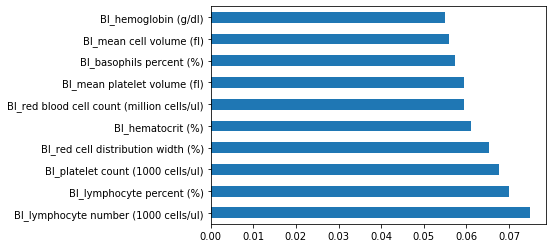

In [16]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## 3. Correlation Matrix with Heatmap

(18.0, 0.0)

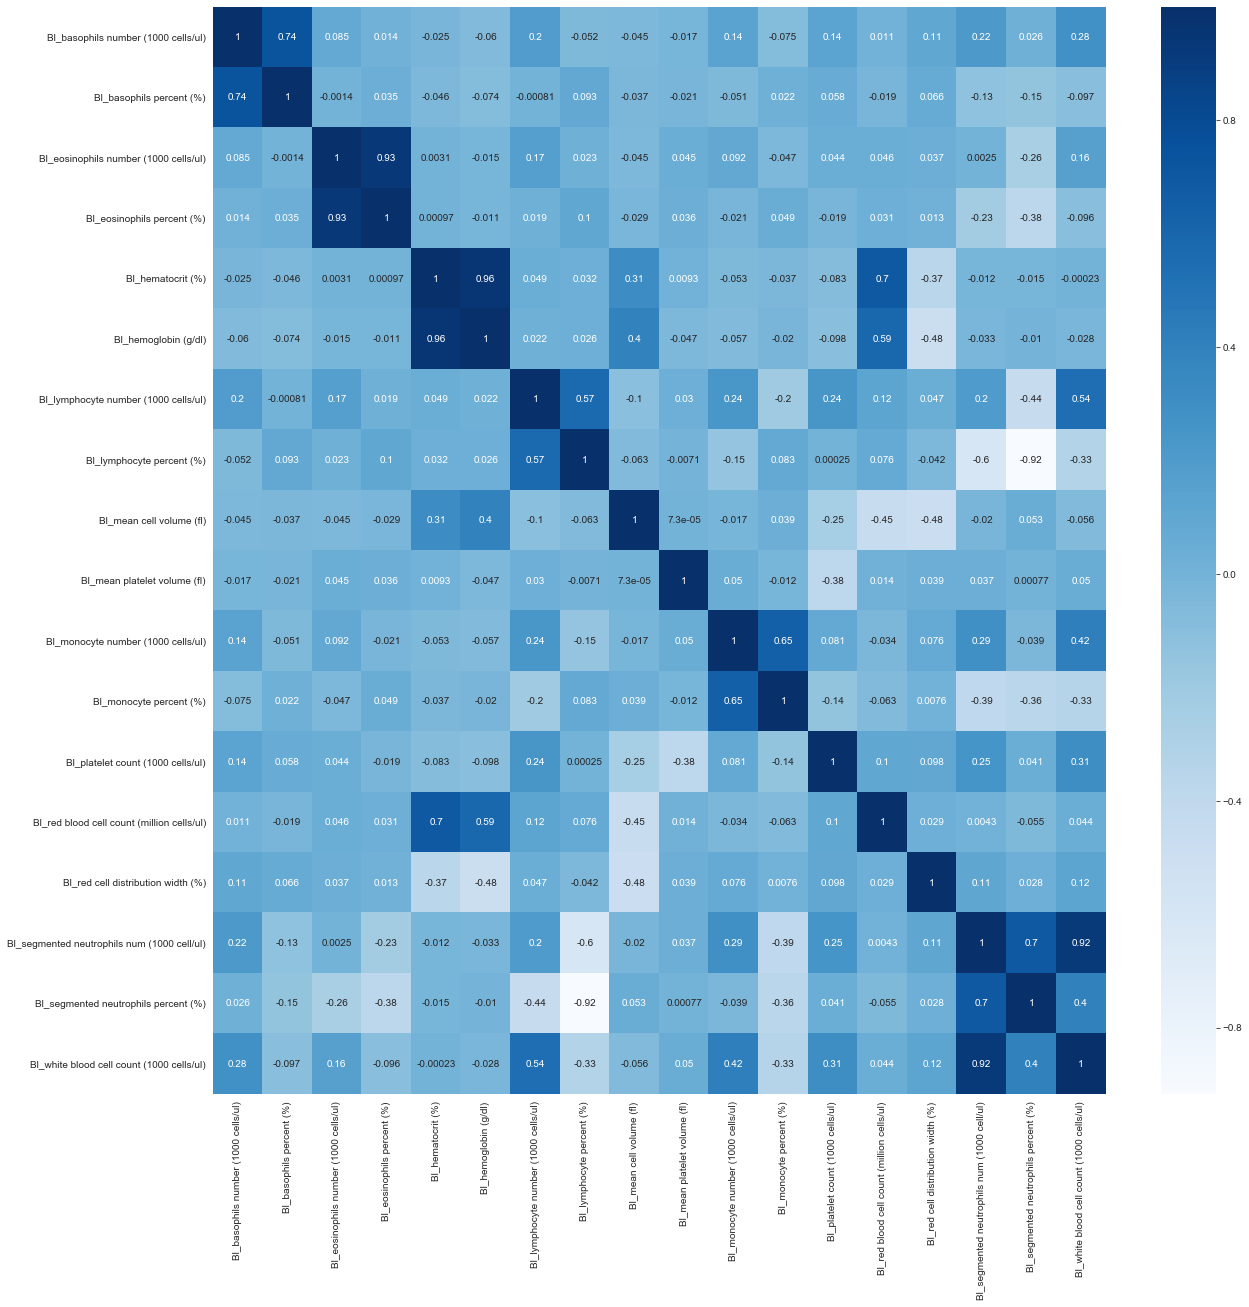

In [17]:
sns.set_style('darkgrid', {'legend.frameon':True})

#get correlations of each features in dataset
corrmat = train_X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
ax=sns.heatmap(train_X[top_corr_features].corr(),annot=True,cmap="Blues")
#making sure the heatmap will not be cut
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [18]:
train.columns

Index(['Id', 'Age', 'Bl_basophils number (1000 cells/ul)',
       'Bl_basophils percent (%)', 'Bl_eosinophils number (1000 cells/ul)',
       'Bl_eosinophils percent (%)', 'Bl_hematocrit (%)',
       'Bl_hemoglobin (g/dl)', 'Bl_lymphocyte number (1000 cells/ul)',
       'Bl_lymphocyte percent (%)', 'Bl_mean cell volume (fl)',
       'Bl_mean platelet volume (fl)', 'Bl_monocyte number (1000 cells/ul)',
       'Bl_monocyte percent (%)', 'Bl_platelet count (1000 cells/ul)',
       'Bl_red blood cell count (million cells/ul)',
       'Bl_red cell distribution width (%)',
       'Bl_segmented neutrophils num (1000 cell/ul)',
       'Bl_segmented neutrophils percent (%)',
       'Bl_white blood cell count (1000 cells/ul)', 'Breast cancer'],
      dtype='object')

#### values that are correlated:
- 'Bl_basophils percent (%)', 'Bl_eosinophils number (1000 cells/ul)'
- 'Bl_eosinophils number (1000 cells/ul)', 'Bl_eosinophils percent (%)
- 'Bl_hematocrit (%)','Bl_hemoglobin (g/dl)'
- 'Bl_hematocrit (%)'. 'Bl_red blood cell count (million cells/ul)'
- 'Bl_lymphocyte number (1000 cells/ul)','Bl_lymphocyte percent (%)'
- 'Bl_monocyte number (1000 cells/ul)','Bl_monocyte percent (%)'
- 'Bl_segmented neutrophils num (1000 cell/ul)','Bl_segmented neutrophils percent (%)',
- 'Bl_segmented neutrophils num (1000 cell/ul)', 'Bl_white blood cell count (1000 cells/ul)'
- 'Bl_segmented neutrophils percent (%)', 'Bl_lymphocyte percent (%)'

## Curse of dimensionality. PCA for dimensionality reduction
- https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad
PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

- Note that the PCA directions are highly sensitive to data scaling, and we need to standardize the features prior to PCA if the features were measured on different scales and we want to assign equal importance to all features.

1. Standardize the d-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
5. Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k ≤ d).
6. Construct a projection matrix W from the “top” k eigenvectors.
7. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.


### Feature scaling - prior to PCA


In [21]:
# Feature scaling - standardize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler
std = scaler()

#fit on training set only
scaled_fitted = std.fit(train_X[num_col])

# apply transform to both the training and test set
scaled_train = scaled_fitted.transform(train_X[num_col])
scaled_train = pd.DataFrame(scaled_train, columns=num_col)

scaled_test = scaled_fitted.transform(test_X[num_col])
scaled_test = pd.DataFrame(scaled_test, columns=num_col)


# PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
# intialize pca and logistic regression model
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(scaled_train)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [24]:
finalDf = pd.concat([principalDf, train[target_col].reset_index(drop=True)], axis = 1, sort=False)

In [25]:
finalDf

,principal component 1,principal component 2,Breast cancer
0,0.845974,0.243380,0
1,1.219232,1.299006,0
2,-0.107004,0.067720,0
3,1.338633,0.509559,0
4,-1.255341,-1.610509,1
...,...,...,...
927,0.353235,0.082713,1
928,-0.266954,2.668619,1
929,-0.591651,0.398659,1
930,0.442205,-1.030951,1


### Visualize 2D

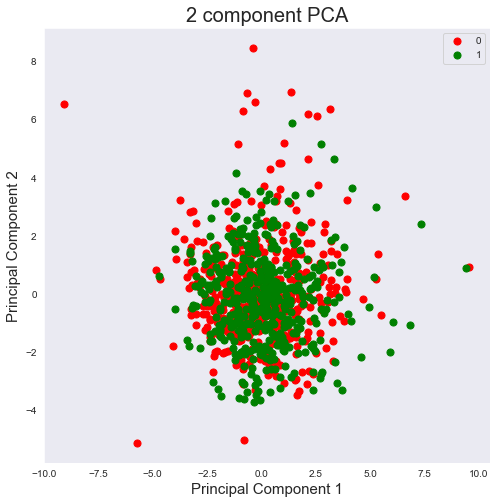

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Breast cancer'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [27]:
pca.explained_variance_ratio_


array([0.1874861, 0.155148 ])

# PCA to Speed-up Machine Learning Algorithms


In [28]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [29]:
#fitting PCA on the training set only
pca.fit(scaled_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
# 95% variance amounts to 9 principal components
pca.n_components_

9

In [31]:
## Apply the mapping (transform) to both the training set and the test set.
scaled_train = pca.transform(scaled_train)
scaled_test = pca.transform(scaled_test)

In [32]:
# Apply Logistic Regression to the Transformed Data
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [33]:
# Training the model on the data, storing the information learned from the data
logisticRegr.fit(scaled_train, y)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#Predict the labels of new data
# Predict for One Observation
logisticRegr.predict(scaled_test[0].reshape(1,-1))

array([1])

In [35]:
# Predict for All Observation (image)
logisticRegr.predict(scaled_test[0:10])

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [36]:
# model performance
logisticRegr.score(scaled_test, y)

ValueError: Found input variables with inconsistent numbers of samples: [932, 234]

# 3. Heatmap - remove the parameters that seem to be multicorrelated

- 'Bl_basophils percent (%)', 'Bl_basophils number (1000 cells/ul)'
- 'Bl_eosinophils number (1000 cells/ul)', 'Bl_eosinophils percent (%)
- 'Bl_hematocrit (%)','Bl_hemoglobin (g/dl)'
- 'Bl_hematocrit (%)'. 'Bl_red blood cell count (million cells/ul)'
- 'Bl_lymphocyte number (1000 cells/ul)','Bl_lymphocyte percent (%)'
- 'Bl_monocyte number (1000 cells/ul)','Bl_monocyte percent (%)'
- 'Bl_segmented neutrophils num (1000 cell/ul)','Bl_segmented neutrophils percent (%)',
- 'Bl_segmented neutrophils num (1000 cell/ul)', 'Bl_white blood cell count (1000 cells/ul)'
- 'Bl_segmented neutrophils percent (%)', 'Bl_lymphocyte percent (%)'

In [37]:
# removing the columns that could be multicorrelated
train_X = train_X.drop(columns = ['Bl_basophils number (1000 cells/ul)',
                        'Bl_eosinophils number (1000 cells/ul)',
                        'Bl_hemoglobin (g/dl)',
                        'Bl_red blood cell count (million cells/ul)',
                        'Bl_lymphocyte number (1000 cells/ul)',
                        'Bl_monocyte number (1000 cells/ul)',
                        'Bl_segmented neutrophils num (1000 cell/ul)',
                        'Bl_segmented neutrophils percent (%)'                        
                       ])


In [38]:
train = train.drop(columns = ['Bl_basophils number (1000 cells/ul)',
                        'Bl_eosinophils number (1000 cells/ul)',
                        'Bl_hemoglobin (g/dl)',
                        'Bl_red blood cell count (million cells/ul)',
                        'Bl_lymphocyte number (1000 cells/ul)',
                        'Bl_monocyte number (1000 cells/ul)',
                        'Bl_segmented neutrophils num (1000 cell/ul)',
                        'Bl_segmented neutrophils percent (%)'                        
                       ])

(13.0, 0.0)

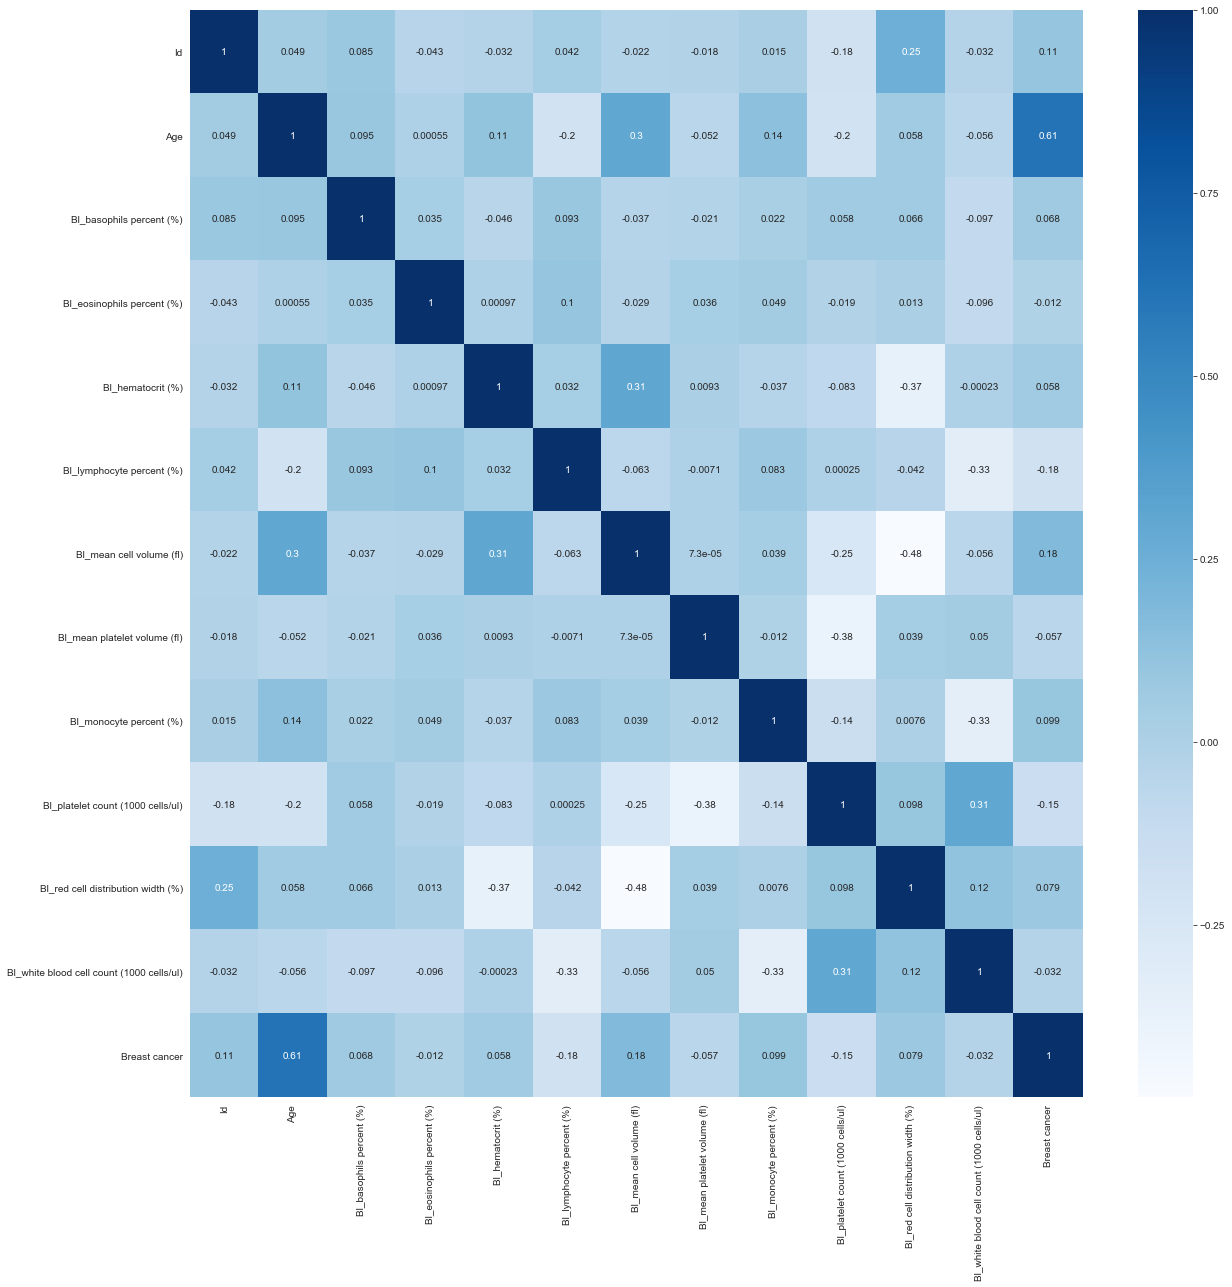

In [40]:
sns.set_style('darkgrid', {'legend.frameon':True})

#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
ax=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="Blues")
#making sure the heatmap will not be cut
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
